In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model Building

### Get the cleaned and pivotted files for each measure category
### Apply weights (multiply by 22 or 4 as per deloite case study
### Merge the Data frames on provider id 
### Get the target variable from Hospital General Information file - 'Hospital Overall Rating'
### Apply Quantile transformer to normalize the data 
### Apply RFE and Build Liniear model

In [37]:
df1=pd.read_csv("Efficiency_score.csv")
df2=pd.read_csv("Mortality_score.csv")
df3=pd.read_csv("Readmission_score.csv")
df4=pd.read_csv("Patient_exp_score.csv")
df5=pd.read_csv("SafetyOfCare_Final.csv")
df6=pd.read_csv("EffectivenessOfCare_Final.csv")
df7=pd.read_csv("TimelinessOfCare_Final.csv")

In [8]:
df1.head(1)
df2.head(1)
df3.head(1)

,Provider ID,OP_10,OP_11,OP_13,OP_14,OP_8,Efficiency_score
0,10001,4.416,0.144,-0.071,-0.048,3.048,1.4978


In [38]:
df1=df1.drop('Unnamed: 0',axis=1)
df2=df2.drop('Unnamed: 0',axis=1)
df3=df3.drop('Unnamed: 0',axis=1)
df4=df4.drop('Unnamed: 0',axis=1)
df5=df5.drop('Unnamed: 0',axis=1)
df6=df6.drop('Unnamed: 0',axis=1)
df7=df7.drop('Unnamed: 0',axis=1)

In [39]:
df1.iloc[:,1:] = df1.iloc[:,1:] * 4
df1.head()

,Provider ID,OP_10,OP_11,OP_13,OP_14,OP_8,Efficiency_score
0,10001,17.664,0.576,-0.284,-0.192,12.192,5.9912
1,10005,36.708,6.528,-0.212,-0.320,13.696,11.2800
2,10006,32.568,2.944,-0.000,-0.368,14.592,9.9472
3,10007,67.068,3.904,-0.000,-0.000,0.000,14.1944
4,10008,9.936,0.000,-0.000,-0.048,0.000,1.9776


In [40]:
df2.iloc[:,1:] = df2.iloc[:,1:] * 22
df2.head()

,Provider ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,Mort_score
0,10001,132.000,32.34,126.852,201.872,225.060,176.176,149.050000
1,10005,168.960,0.00,103.664,252.340,302.016,177.320,167.383333
2,10006,176.352,31.57,96.844,253.968,264.264,204.776,171.295667
3,10007,0.000,0.00,126.852,234.432,272.976,189.904,137.360667
4,10008,0.000,0.00,111.848,206.756,227.964,0.000,91.094667


In [41]:
df3.iloc[:,1:] = df3.iloc[:,1:] * 22
df3.head()

,Provider ID,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,Readmission_score
0,10001,196.020,89.694,264.594,296.604,47.124,318.472,250.954,148.082,201.44300
1,10005,198.396,0.000,225.720,303.534,52.668,308.132,220.088,156.244,183.09775
2,10006,191.268,90.288,248.292,285.516,46.200,318.472,240.218,139.920,195.02175
3,10007,0.000,0.000,249.546,292.446,0.000,343.288,232.166,148.082,158.19100
4,10008,0.000,0.000,240.768,320.166,0.000,324.676,214.720,0.000,137.54125


In [42]:
df4.iloc[:,1:] = df4.iloc[:,1:] * 22
df4.head()

,Provider ID,H_CLEAN_STAR_RATING,H_COMP_1_STAR_RATING,H_COMP_2_STAR_RATING,H_COMP_3_STAR_RATING,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_HSP_RATING_STAR_RATING,H_QUIET_STAR_RATING,H_RECMND_STAR_RATING,Patent_exp_score
0,10001,28.6,48.84,40.26,30.8,44.22,45.54,38.28,50.82,68.64,51.04,65.12,46.56
1,10005,28.6,48.84,53.68,46.2,44.22,45.54,51.04,33.88,68.64,51.04,48.84,47.32
2,10006,28.6,48.84,53.68,46.2,44.22,45.54,25.52,33.88,34.32,51.04,32.56,40.40
3,10007,42.9,48.84,67.10,61.6,58.96,60.72,38.28,50.82,51.48,63.80,48.84,53.94
4,10011,14.3,48.84,40.26,30.8,44.22,30.36,38.28,33.88,51.48,38.28,48.84,38.14


In [43]:
df5.iloc[:,1:] = df5.iloc[:,1:] * 22
df5.head()

,Provider ID,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,COMP_HIP_KNEE,PSI,SafetyOfCare_score
0,10001,2.29680,3.45334,3.70260,0.0,0.09284,0.017314,14.212,3737.2236,470.124812
1,10005,1.40184,1.10352,0.76428,0.0,0.30536,0.008910,11.220,4068.4710,510.409364
2,10006,0.45012,1.55122,0.61380,0.0,0.27742,0.011286,14.212,4262.2272,534.917881
3,10007,0.00000,0.00000,0.00000,0.0,0.00000,0.000000,0.000,356.4132,44.551650
4,10008,0.00000,0.00000,0.00000,0.0,0.00000,0.012870,0.000,68.3364,8.543659


In [44]:
df6.iloc[:,1:] = df6.iloc[:,1:] * 4
df6.head()

,Provider ID,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_22,OP_23,OP_29,OP_30,OP_4,PC_01,STK_4,VTE_5,VTE_6,TimelinessOfCare_score
0,10001,159.08,55.08,3.68,0.00,0.00,131.2,0.00,0.00,176.88,208.80,0.0,66.792727
1,10005,162.36,56.44,1.84,151.36,117.76,147.2,150.48,1.04,0.00,232.00,0.0,92.770909
2,10006,164.00,59.16,0.92,0.00,89.60,140.8,0.00,0.00,0.00,213.44,0.0,60.720000
3,10007,162.36,36.04,0.92,0.00,0.00,0.0,135.28,0.00,0.00,0.00,0.0,30.418182
4,10008,155.80,29.24,0.92,0.00,122.88,155.2,0.00,0.00,0.00,0.00,0.0,42.185455


In [45]:
df6=df6.rename(columns={"TimelinessOfCare_score":"EffectivenessOfCare_score"})
df6.head()

,Provider ID,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_22,OP_23,OP_29,OP_30,OP_4,PC_01,STK_4,VTE_5,VTE_6,EffectivenessOfCare_score
0,10001,159.08,55.08,3.68,0.00,0.00,131.2,0.00,0.00,176.88,208.80,0.0,66.792727
1,10005,162.36,56.44,1.84,151.36,117.76,147.2,150.48,1.04,0.00,232.00,0.0,92.770909
2,10006,164.00,59.16,0.92,0.00,89.60,140.8,0.00,0.00,0.00,213.44,0.0,60.720000
3,10007,162.36,36.04,0.92,0.00,0.00,0.0,135.28,0.00,0.00,0.00,0.0,30.418182
4,10008,155.80,29.24,0.92,0.00,122.88,155.2,0.00,0.00,0.00,0.00,0.0,42.185455


In [46]:
df7.iloc[:,1:] = df7.iloc[:,1:] * 4
df7.head()

,Provider ID,ED_1b,ED_2b,OP_18b,OP_20,OP_21,OP_3b,OP_5,TimelinessOfCare_score
0,10001,759.2256,165.4848,452.8384,73.0340,73.2204,0.0,0.00,217.686171
1,10005,685.8432,172.7856,270.3168,30.3372,44.3760,0.0,1.92,172.225543
2,10006,612.4608,189.8208,307.2832,11.2360,42.8968,0.0,0.00,166.242514
3,10007,618.1056,165.4848,274.9376,42.6968,66.5640,0.0,1.12,166.986971
4,10008,508.0320,136.2816,226.4192,30.3372,36.2404,0.0,0.00,133.901486


In [47]:
df= pd.merge(df1, df2, on='Provider ID', how='outer')

In [48]:
df= pd.merge(df, df3, on='Provider ID', how='outer')

In [49]:
df= pd.merge(df, df4, on='Provider ID', how='outer')

In [51]:
df= pd.merge(df, df5, on='Provider ID', how='outer')

In [52]:
df= pd.merge(df, df6, on='Provider ID', how='outer')

In [53]:
df= pd.merge(df, df7, on='Provider ID', how='outer')

In [54]:
df.shape

(4818, 73)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 0 to 4817
Data columns (total 73 columns):
Provider ID                  4818 non-null int64
OP_10                        3779 non-null float64
OP_11                        3779 non-null float64
OP_13                        3779 non-null float64
OP_14                        3779 non-null float64
OP_8                         3779 non-null float64
Efficiency_score             3779 non-null float64
MORT_30_AMI                  4112 non-null float64
MORT_30_CABG                 4112 non-null float64
MORT_30_COPD                 4112 non-null float64
MORT_30_HF                   4112 non-null float64
MORT_30_PN                   4112 non-null float64
MORT_30_STK                  4112 non-null float64
Mort_score                   4112 non-null float64
READM_30_AMI                 4405 non-null float64
READM_30_CABG                4405 non-null float64
READM_30_COPD                4405 non-null float64
READM_30_HF                 

In [56]:
# Check the data for percentage of null values

round((df.isnull().sum()/df.isnull().count())*100,2)

Provider ID                   0.00
OP_10                        21.56
OP_11                        21.56
OP_13                        21.56
OP_14                        21.56
OP_8                         21.56
Efficiency_score             21.56
MORT_30_AMI                  14.65
MORT_30_CABG                 14.65
MORT_30_COPD                 14.65
MORT_30_HF                   14.65
MORT_30_PN                   14.65
MORT_30_STK                  14.65
Mort_score                   14.65
READM_30_AMI                  8.57
READM_30_CABG                 8.57
READM_30_COPD                 8.57
READM_30_HF                   8.57
READM_30_HIP_KNEE             8.57
READM_30_HOSP_WIDE            8.57
READM_30_PN                   8.57
READM_30_STK                  8.57
Readmission_score             8.57
H_CLEAN_STAR_RATING          27.27
H_COMP_1_STAR_RATING         27.27
H_COMP_2_STAR_RATING         27.27
H_COMP_3_STAR_RATING         27.27
H_COMP_4_STAR_RATING         27.27
H_COMP_5_STAR_RATING

In [57]:
df.fillna(0, inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 0 to 4817
Data columns (total 73 columns):
Provider ID                  4818 non-null int64
OP_10                        4818 non-null float64
OP_11                        4818 non-null float64
OP_13                        4818 non-null float64
OP_14                        4818 non-null float64
OP_8                         4818 non-null float64
Efficiency_score             4818 non-null float64
MORT_30_AMI                  4818 non-null float64
MORT_30_CABG                 4818 non-null float64
MORT_30_COPD                 4818 non-null float64
MORT_30_HF                   4818 non-null float64
MORT_30_PN                   4818 non-null float64
MORT_30_STK                  4818 non-null float64
Mort_score                   4818 non-null float64
READM_30_AMI                 4818 non-null float64
READM_30_CABG                4818 non-null float64
READM_30_COPD                4818 non-null float64
READM_30_HF                 

In [59]:
df_target=pd.read_csv("Hospital General Information_C.csv")
df_target.head()

,Provider ID,Hospital Name,ZIP Code,County Name,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,36301,HOUSTON,Acute Care Hospitals,Government - Hospital District or Authority,1,3,2,3,2,1,2,2,2
1,10005,MARSHALL MEDICAL CENTER SOUTH,35957,MARSHALL,Acute Care Hospitals,Government - Hospital District or Authority,1,3,1,2,3,2,2,3,1
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,35631,LAUDERDALE,Acute Care Hospitals,Government - Hospital District or Authority,1,2,1,2,2,1,2,3,2
3,10011,ST VINCENT'S EAST,35235,JEFFERSON,Acute Care Hospitals,Voluntary non-profit - Private,1,2,2,1,2,1,1,2,2
4,10012,DEKALB REGIONAL MEDICAL CENTER,35968,DE KALB,Acute Care Hospitals,Proprietary,1,3,1,2,2,2,2,3,2


In [60]:
dft=df_target[['Provider ID','Hospital overall rating']]
dft.head()

,Provider ID,Hospital overall rating
0,10001,3
1,10005,3
2,10006,2
3,10011,2
4,10012,3


In [61]:
df= pd.merge(df, dft, on='Provider ID', how='outer')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 0 to 4817
Data columns (total 74 columns):
Provider ID                  4818 non-null int64
OP_10                        4818 non-null float64
OP_11                        4818 non-null float64
OP_13                        4818 non-null float64
OP_14                        4818 non-null float64
OP_8                         4818 non-null float64
Efficiency_score             4818 non-null float64
MORT_30_AMI                  4818 non-null float64
MORT_30_CABG                 4818 non-null float64
MORT_30_COPD                 4818 non-null float64
MORT_30_HF                   4818 non-null float64
MORT_30_PN                   4818 non-null float64
MORT_30_STK                  4818 non-null float64
Mort_score                   4818 non-null float64
READM_30_AMI                 4818 non-null float64
READM_30_CABG                4818 non-null float64
READM_30_COPD                4818 non-null float64
READM_30_HF                 

In [63]:
df['Hospital overall rating'].unique()

array([ 3.,  2., nan,  4.,  5.,  1.])

In [64]:
# Dropping the records where we dont have the target ratings available
df= df.dropna()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 3772
Data columns (total 74 columns):
Provider ID                  2333 non-null int64
OP_10                        2333 non-null float64
OP_11                        2333 non-null float64
OP_13                        2333 non-null float64
OP_14                        2333 non-null float64
OP_8                         2333 non-null float64
Efficiency_score             2333 non-null float64
MORT_30_AMI                  2333 non-null float64
MORT_30_CABG                 2333 non-null float64
MORT_30_COPD                 2333 non-null float64
MORT_30_HF                   2333 non-null float64
MORT_30_PN                   2333 non-null float64
MORT_30_STK                  2333 non-null float64
Mort_score                   2333 non-null float64
READM_30_AMI                 2333 non-null float64
READM_30_CABG                2333 non-null float64
READM_30_COPD                2333 non-null float64
READM_30_HF                 

In [66]:
from sklearn.preprocessing import QuantileTransformer

In [67]:
df_bkp=df
df_bkp.head()


,Provider ID,OP_10,OP_11,OP_13,OP_14,OP_8,Efficiency_score,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,...,EffectivenessOfCare_score,ED_1b,ED_2b,OP_18b,OP_20,OP_21,OP_3b,OP_5,TimelinessOfCare_score,Hospital overall rating
0,10001,17.664,0.576,-0.284,-0.192,12.192,5.9912,132.000,32.34,126.852,...,66.792727,759.2256,165.4848,452.8384,73.0340,73.2204,0.0,0.00,217.686171,3.0
1,10005,36.708,6.528,-0.212,-0.320,13.696,11.2800,168.960,0.00,103.664,...,92.770909,685.8432,172.7856,270.3168,30.3372,44.3760,0.0,1.92,172.225543,3.0
2,10006,32.568,2.944,-0.000,-0.368,14.592,9.9472,176.352,31.57,96.844,...,60.720000,612.4608,189.8208,307.2832,11.2360,42.8968,0.0,0.00,166.242514,2.0
5,10011,6.624,6.656,-0.000,-0.272,11.584,4.9184,146.784,28.49,100.936,...,56.116364,807.2064,172.7856,360.4224,60.6744,54.7304,0.0,0.00,207.974171,2.0
6,10012,16.836,6.912,-0.124,-0.000,0.000,4.7248,177.408,0.00,125.488,...,95.120000,533.4336,126.5472,277.2480,38.2024,43.6364,0.0,0.00,145.581086,3.0


In [28]:
df=df_bkp
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 3772
Data columns (total 36 columns):
Provider ID                 2333 non-null int64
OP_10                       2333 non-null float64
OP_11                       2333 non-null float64
OP_13                       2333 non-null float64
OP_14                       2333 non-null float64
OP_8                        2333 non-null float64
Efficiency_score            2333 non-null float64
MORT_30_AMI                 2333 non-null float64
MORT_30_CABG                2333 non-null float64
MORT_30_COPD                2333 non-null float64
MORT_30_HF                  2333 non-null float64
MORT_30_PN                  2333 non-null float64
MORT_30_STK                 2333 non-null float64
Mort_score                  2333 non-null float64
READM_30_AMI                2333 non-null float64
READM_30_CABG               2333 non-null float64
READM_30_COPD               2333 non-null float64
READM_30_HF                 2333 non-null flo

In [68]:
dfc=df.drop(['Provider ID'],axis=1)
list=dfc.columns.tolist()

In [69]:
dfn=df_bkp.drop(['Provider ID'],axis=1)

In [70]:
list

['OP_10',
 'OP_11',
 'OP_13',
 'OP_14',
 'OP_8',
 'Efficiency_score',
 'MORT_30_AMI',
 'MORT_30_CABG',
 'MORT_30_COPD',
 'MORT_30_HF',
 'MORT_30_PN',
 'MORT_30_STK',
 'Mort_score',
 'READM_30_AMI',
 'READM_30_CABG',
 'READM_30_COPD',
 'READM_30_HF',
 'READM_30_HIP_KNEE',
 'READM_30_HOSP_WIDE',
 'READM_30_PN',
 'READM_30_STK',
 'Readmission_score',
 'H_CLEAN_STAR_RATING',
 'H_COMP_1_STAR_RATING',
 'H_COMP_2_STAR_RATING',
 'H_COMP_3_STAR_RATING',
 'H_COMP_4_STAR_RATING',
 'H_COMP_5_STAR_RATING',
 'H_COMP_6_STAR_RATING',
 'H_COMP_7_STAR_RATING',
 'H_HSP_RATING_STAR_RATING',
 'H_QUIET_STAR_RATING',
 'H_RECMND_STAR_RATING',
 'Patent_exp_score',
 'HAI_1_SIR_x',
 'HAI_2_SIR_x',
 'HAI_3_SIR_x',
 'HAI_4_SIR_x',
 'HAI_5_SIR_x',
 'HAI_6_SIR_x',
 'COMP_HIP_KNEE_x',
 'PSI_x',
 'SafetyOfCare_score_x',
 'HAI_1_SIR_y',
 'HAI_2_SIR_y',
 'HAI_3_SIR_y',
 'HAI_4_SIR_y',
 'HAI_5_SIR_y',
 'HAI_6_SIR_y',
 'COMP_HIP_KNEE_y',
 'PSI_y',
 'SafetyOfCare_score_y',
 'IMM_2',
 'IMM_3_OP_27_FAC_ADHPCT',
 'OP_22',
 'O

In [71]:
qnt= QuantileTransformer(output_distribution='normal')
dfn[list]=pd.DataFrame(qnt.fit_transform(df[list]))

In [72]:
dfa=pd.DataFrame(qnt.fit_transform(df.iloc[:,1:]))

In [73]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 3772
Data columns (total 73 columns):
OP_10                        1419 non-null float64
OP_11                        1419 non-null float64
OP_13                        1419 non-null float64
OP_14                        1419 non-null float64
OP_8                         1419 non-null float64
Efficiency_score             1419 non-null float64
MORT_30_AMI                  1419 non-null float64
MORT_30_CABG                 1419 non-null float64
MORT_30_COPD                 1419 non-null float64
MORT_30_HF                   1419 non-null float64
MORT_30_PN                   1419 non-null float64
MORT_30_STK                  1419 non-null float64
Mort_score                   1419 non-null float64
READM_30_AMI                 1419 non-null float64
READM_30_CABG                1419 non-null float64
READM_30_COPD                1419 non-null float64
READM_30_HF                  1419 non-null float64
READM_30_HIP_KNEE         

In [77]:
dfn=dfn.dropna()

In [103]:
dff = pd.concat([dfn,df['Hospital overall rating']],axis=1)

In [113]:
from sklearn.model_selection import train_test_split


df_train, df_test = train_test_split(dfn, train_size = 0.7, test_size = 0.3, random_state = 100)

In [114]:
y_train = df_train.pop('Hospital overall rating')
X_train = df_train

In [115]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,64)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [96]:
#Get the columns selected by rfe
col = X_train.columns[rfe.support_]
col

Index(['OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8', 'Efficiency_score',
       'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
       'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG', 'READM_30_COPD',
       'READM_30_HF', 'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE', 'READM_30_PN',
       'READM_30_STK', 'Readmission_score', 'H_CLEAN_STAR_RATING',
       'H_COMP_1_STAR_RATING', 'H_COMP_2_STAR_RATING', 'H_COMP_3_STAR_RATING',
       'H_COMP_4_STAR_RATING', 'H_COMP_5_STAR_RATING', 'H_COMP_6_STAR_RATING',
       'H_COMP_7_STAR_RATING', 'H_HSP_RATING_STAR_RATING',
       'H_QUIET_STAR_RATING', 'Patent_exp_score', 'HAI_1_SIR_x', 'HAI_2_SIR_x',
       'HAI_3_SIR_x', 'HAI_4_SIR_x', 'HAI_5_SIR_x', 'HAI_6_SIR_x',
       'COMP_HIP_KNEE_x', 'PSI_x', 'SafetyOfCare_score_x', 'HAI_1_SIR_y',
       'HAI_2_SIR_y', 'HAI_3_SIR_y', 'HAI_4_SIR_y', 'HAI_5_SIR_y',
       'HAI_6_SIR_y', 'COMP_HIP_KNEE_y', 'PSI_y', 'SafetyOfCare_score_y',
       'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_22', 'OP_23', 'OP_

In [116]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [117]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [118]:
#Let's see the summary of our linear model
print(lm.summary())

                               OLS Regression Results                              
Dep. Variable:     Hospital overall rating   R-squared:                       0.650
Model:                                 OLS   Adj. R-squared:                  0.629
Method:                      Least Squares   F-statistic:                     31.64
Date:                     Thu, 12 Sep 2019   Prob (F-statistic):          1.64e-175
Time:                             20:46:31   Log-Likelihood:                -1345.9
No. Observations:                      993   AIC:                             2804.
Df Residuals:                          937   BIC:                             3078.
Df Model:                               55                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [121]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [45]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
lr.fit(X_train_rfe,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [125]:
X_train_rfe.head()

,const,OP_10,OP_11,OP_13,OP_14,OP_8,Efficiency_score,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,...,OP_4,VTE_5,VTE_6,ED_1b,ED_2b,OP_18b,OP_20,OP_21,OP_5,TimelinessOfCare_score
1600,1.0,-0.291367,-5.199338,-0.318969,5.199338,1.275302,0.119514,-5.199338,0.245840,0.824933,...,0.454249,-5.199338,-5.199338,-0.513491,-0.030114,-0.899534,-1.289578,0.901416,-0.041413,-0.487251
2332,1.0,0.092972,-5.199338,0.388430,5.199338,0.160010,0.172754,-5.199338,-0.079120,-0.459820,...,-5.199338,-5.199338,-5.199338,-0.903301,-0.882739,-0.081638,0.758004,0.459820,-5.199338,-0.696593
180,1.0,-1.006211,-5.199338,0.121995,0.840906,0.207223,-0.523609,0.469603,-0.079120,-0.388430,...,-5.199338,5.199338,2.063775,-0.308427,-1.140077,1.130517,1.010382,1.023003,-5.199338,-0.075778
954,1.0,1.037937,-0.573115,-0.516356,0.527858,-0.075345,0.957304,0.303168,-1.104747,0.134645,...,-5.199338,5.199338,-5.199338,0.550346,0.120731,1.264066,1.181921,0.099274,-5.199338,0.605512
2144,1.0,-0.144780,-0.707140,-0.631785,-0.045180,0.396560,0.033603,0.979511,1.280981,-0.943656,...,-5.199338,5.199338,-5.199338,0.920412,0.773140,1.171890,0.180377,0.204660,-5.199338,0.936586


In [46]:
!pip install eli5

You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [126]:
import eli5

eli5.show_weights(lr,feature_names=['const','OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8', 'Efficiency_score',
       'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
       'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG', 'READM_30_COPD',
       'READM_30_HF', 'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE', 'READM_30_PN',
       'READM_30_STK', 'Readmission_score', 'H_CLEAN_STAR_RATING',
       'H_COMP_1_STAR_RATING', 'H_COMP_2_STAR_RATING', 'H_COMP_3_STAR_RATING',
       'H_COMP_4_STAR_RATING', 'H_COMP_5_STAR_RATING', 'H_COMP_6_STAR_RATING',
       'H_COMP_7_STAR_RATING', 'H_HSP_RATING_STAR_RATING',
       'H_QUIET_STAR_RATING', 'Patent_exp_score', 'HAI_1_SIR_x', 'HAI_2_SIR_x',
       'HAI_3_SIR_x', 'HAI_4_SIR_x', 'HAI_5_SIR_x', 'HAI_6_SIR_x',
       'COMP_HIP_KNEE_x', 'PSI_x', 'SafetyOfCare_score_x', 'HAI_1_SIR_y',
       'HAI_2_SIR_y', 'HAI_3_SIR_y', 'HAI_4_SIR_y', 'HAI_5_SIR_y',
       'HAI_6_SIR_y', 'COMP_HIP_KNEE_y', 'PSI_y', 'SafetyOfCare_score_y',
       'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_22', 'OP_23', 'OP_30', 'OP_4',
       'VTE_5', 'VTE_6', 'ED_1b', 'ED_2b', 'OP_18b', 'OP_20', 'OP_21', 'OP_5',
       'TimelinessOfCare_score'])

In [130]:
eli5df= eli5.explain_weights_df(lr,feature_names=['const','OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8', 'Efficiency_score',
       'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
       'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG', 'READM_30_COPD',
       'READM_30_HF', 'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE', 'READM_30_PN',
       'READM_30_STK', 'Readmission_score', 'H_CLEAN_STAR_RATING',
       'H_COMP_1_STAR_RATING', 'H_COMP_2_STAR_RATING', 'H_COMP_3_STAR_RATING',
       'H_COMP_4_STAR_RATING', 'H_COMP_5_STAR_RATING', 'H_COMP_6_STAR_RATING',
       'H_COMP_7_STAR_RATING', 'H_HSP_RATING_STAR_RATING',
       'H_QUIET_STAR_RATING', 'Patent_exp_score', 'HAI_1_SIR_x', 'HAI_2_SIR_x',
       'HAI_3_SIR_x', 'HAI_4_SIR_x', 'HAI_5_SIR_x', 'HAI_6_SIR_x',
       'COMP_HIP_KNEE_x', 'PSI_x', 'SafetyOfCare_score_x', 'HAI_1_SIR_y',
       'HAI_2_SIR_y', 'HAI_3_SIR_y', 'HAI_4_SIR_y', 'HAI_5_SIR_y',
       'HAI_6_SIR_y', 'COMP_HIP_KNEE_y', 'PSI_y', 'SafetyOfCare_score_y',
       'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_22', 'OP_23', 'OP_30', 'OP_4',
       'VTE_5', 'VTE_6', 'ED_1b', 'ED_2b', 'OP_18b', 'OP_20', 'OP_21', 'OP_5',
       'TimelinessOfCare_score'])

In [131]:
eli5df.head()

,target,feature,weight
0,y,HAI_3_SIR_y,7.456397e+11
1,y,PSI_x,2.834790e+11
2,y,SafetyOfCare_score_y,1.421606e+11
3,y,COMP_HIP_KNEE_x,9.592982e+10
4,y,HAI_5_SIR_y,5.933296e+10


In [132]:
eli5df.to_csv('Feature_importance.csv')

AttributeError: module 'eli5' has no attribute 'to_csv'

# Random Forrest Model

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 3772
Data columns (total 74 columns):
Provider ID                  2333 non-null int64
OP_10                        2333 non-null float64
OP_11                        2333 non-null float64
OP_13                        2333 non-null float64
OP_14                        2333 non-null float64
OP_8                         2333 non-null float64
Efficiency_score             2333 non-null float64
MORT_30_AMI                  2333 non-null float64
MORT_30_CABG                 2333 non-null float64
MORT_30_COPD                 2333 non-null float64
MORT_30_HF                   2333 non-null float64
MORT_30_PN                   2333 non-null float64
MORT_30_STK                  2333 non-null float64
Mort_score                   2333 non-null float64
READM_30_AMI                 2333 non-null float64
READM_30_CABG                2333 non-null float64
READM_30_COPD                2333 non-null float64
READM_30_HF                 

In [101]:
# split into X and y
X = df.loc[:, df.columns != 'Hospital overall rating']

y = df['Hospital overall rating']

In [102]:
# scaling the features
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Provider ID', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',
       'Efficiency_score', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD',
       'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK', 'Mort_score', 'READM_30_AMI',
       'READM_30_CABG', 'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK',
       'Readmission_score', 'H_CLEAN_STAR_RATING', 'H_COMP_1_STAR_RATING',
       'H_COMP_2_STAR_RATING', 'H_COMP_3_STAR_RATING', 'H_COMP_4_STAR_RATING',
       'H_COMP_5_STAR_RATING', 'H_COMP_6_STAR_RATING', 'H_COMP_7_STAR_RATING',
       'H_HSP_RATING_STAR_RATING', 'H_QUIET_STAR_RATING',
       'H_RECMND_STAR_RATING', 'Patent_exp_score', 'HAI_1_SIR_x',
       'HAI_2_SIR_x', 'HAI_3_SIR_x', 'HAI_4_SIR_x', 'HAI_5_SIR_x',
       'HAI_6_SIR_x', 'COMP_HIP_KNEE_x', 'PSI_x', 'SafetyOfCare_score_x',
       'HAI_1_SIR_y', 'HAI_2_SIR_y', 'HAI_3_SIR_y', 'HAI_4_SIR_y',
       'HAI_5_SIR_y', 'HAI_6_SIR_y', 'COMP_HIP_KNEE_y', 'PSI_y',
       'Safet

In [103]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [104]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [105]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [106]:
# Making predictions
predictions = rfc.predict(X_test)

In [107]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [108]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.36      0.24      0.29        33
        2.0       0.52      0.46      0.49       163
        3.0       0.58      0.75      0.65       318
        4.0       0.63      0.45      0.53       171
        5.0       1.00      0.27      0.42        15

avg / total       0.58      0.57      0.56       700



In [109]:
print(accuracy_score(y_test,predictions))

0.5728571428571428


# Unsupervised lerning - clustering

In [ ]:
dfa=pd.read_csv("Efficiency_clustering.csv")
dfb=pd.read_csv("Mortality_clustering.csv")
dfc=pd.read_csv("Readmission_cluster.csv")
dfd=pd.read_csv("Patient_exp_cluster.csv")
dfe=pd.read_csv("SafetyOfCare_cluster.csv")
dff=pd.read_csv("SafetyOfCare_Final.csv")
dfg=pd.read_csv("SafetyOfCare_Final.csv")

In [ ]:
dfcl = pd.merge(dfa, dfb,dfc,dfd,dfe,dff,dfg on='Provider ID', how='outer')

In [86]:
#dfcl = df.drop(['Hospital overall rating','Provider ID'], axis=1)

In [87]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [88]:
# Standardize data 
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
dfcl = pd.DataFrame(standard_scaler.fit_transform(dfcl),columns = dfcl.columns)


In [89]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [90]:
#Doing the PCA on the entire data as we dont have to do any predictions
pca.fit(dfcl)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [91]:
# Check the PCA components
pca.components_

array([[ 4.16220397e-04, -8.29063792e-03, -2.93817324e-02, ...,
         1.97477166e-01,  2.43350208e-01,  3.28887097e-01],
       [ 4.28388815e-02,  8.52009453e-02,  1.06857902e-01, ...,
         2.18277515e-02, -1.98004190e-01, -1.08235167e-01],
       [ 1.96781473e-01,  1.53946952e-01,  8.15667448e-02, ...,
         2.75636062e-02, -1.33915484e-01, -6.09577941e-02],
       ...,
       [ 0.00000000e+00, -9.02056208e-17,  1.65051143e-16, ...,
         1.46181819e-02,  1.80046916e-02, -1.25280995e-01],
       [-0.00000000e+00,  3.38271078e-17, -1.16537968e-16, ...,
         1.07110485e-01,  1.31924152e-01, -9.17960131e-01],
       [ 6.50120603e-01,  8.65708837e-02,  2.74405334e-03, ...,
         4.25909328e-05,  5.24577279e-05, -3.65013548e-04]])

In [92]:
# Check the variance ratio
pca.explained_variance_ratio_

array([2.50079344e-01, 1.27287923e-01, 7.65673391e-02, 7.15595046e-02,
       6.32954484e-02, 4.26925671e-02, 3.31156885e-02, 2.72414445e-02,
       2.65726921e-02, 2.47697336e-02, 2.38399160e-02, 2.25367342e-02,
       1.98144750e-02, 1.85175590e-02, 1.84199784e-02, 1.79419207e-02,
       1.58643094e-02, 1.50139448e-02, 1.36113925e-02, 1.30624018e-02,
       1.21689156e-02, 1.09780056e-02, 9.99227792e-03, 9.40708565e-03,
       8.66160073e-03, 8.05628761e-03, 6.81461545e-03, 6.35800832e-03,
       4.06388206e-03, 1.69500417e-03, 5.23861664e-32, 2.07625259e-33,
       1.18792529e-33, 1.86379444e-35])

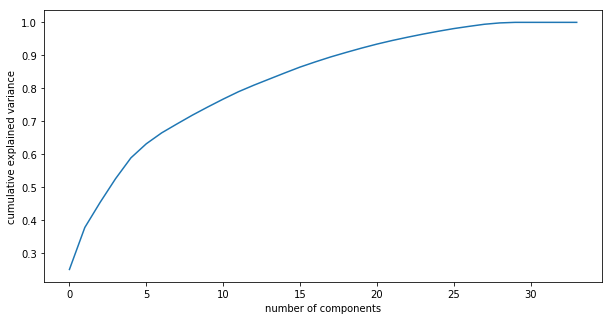

In [93]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
#Here by observing the below curve we can say that around 4 Principle components can describe 95% of the data

In [94]:
#Using incremental PCA not needed as dataset is not so large - and choosing PCs as 4 as per above observation

pca_final = PCA(n_components=12)

In [95]:
# Final PCA dataset
df_pca = pca_final.fit_transform(dfcl)
df_pca.shape



(2333, 12)

In [96]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

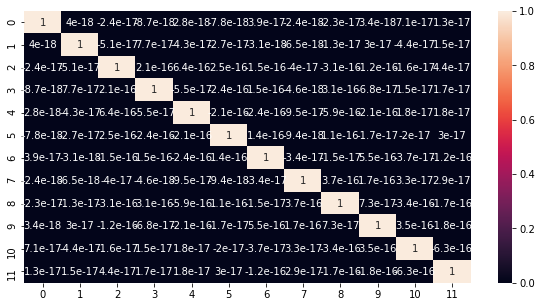

In [97]:
#plotting the correlation matrix - observe that there is very low / no correlation
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

In [98]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are very close to 0

max corr: 6.440100326794228e-16 , min corr:  -6.273383481765308e-16


In [99]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
dfcl.describe(percentiles=[.25,.5,.75,.90,.95,.99])
## we chose to leave the outlires as is as we dont want to miss out on the extreme cases

,OP_10,OP_11,OP_13,OP_14,OP_8,Efficiency_score,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,...,H_COMP_2_STAR_RATING,H_COMP_3_STAR_RATING,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_HSP_RATING_STAR_RATING,H_QUIET_STAR_RATING,H_RECMND_STAR_RATING,Patent_exp_score
count,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,...,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03
mean,-7.725877e-17,8.446832e-17,1.871866e-16,-5.503051e-16,-7.347554e-17,-8.553904e-17,-2.458147e-16,-3.343518e-16,-6.718443e-16,-5.606793e-16,...,-4.685493e-16,1.044314e-15,-5.895175e-16,-9.669838e-17,-2.513587e-15,-7.771085e-16,-4.193436e-16,-8.565801e-19,-2.689662e-16,-5.001476e-16
std,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,...,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00
min,-9.690494e-01,-5.557080e-01,-3.853533e+00,-5.734853e+00,-1.143096e+00,-1.214353e+00,-2.666523e+00,-7.999447e-01,-6.444332e+00,-7.631051e+00,...,-2.260513e+00,-2.348035e+00,-2.909099e+00,-2.525503e+00,-2.950162e+00,-1.686183e+00,-2.945543e+00,-1.826159e+00,-2.181234e+00,-3.105752e+00
25%,-5.863891e-01,-5.355154e-01,-6.284803e-01,-6.615171e-01,-1.143096e+00,-5.977008e-01,8.029143e-02,-7.999447e-01,-6.428628e-01,-6.538648e-01,...,-1.146256e+00,-1.245829e+00,-9.119242e-02,-1.217623e+00,-4.038328e-01,-5.647847e-01,-4.846829e-01,-8.151412e-01,-1.133937e+00,-6.446800e-01
50%,-3.080906e-01,-4.143597e-01,-1.108792e-01,9.408603e-02,4.751311e-01,-2.475196e-01,2.948863e-01,-7.999447e-01,-8.655757e-02,-1.957516e-02,...,-3.199965e-02,-1.436223e-01,-9.119242e-02,9.025659e-02,-4.038328e-01,-5.647847e-01,7.457472e-01,1.958766e-01,-8.663886e-02,8.753979e-02
75%,1.789317e-01,7.026303e-02,6.456148e-01,7.417459e-01,8.527174e-01,2.659106e-01,4.880218e-01,9.322005e-01,5.492199e-01,6.781435e-01,...,1.082257e+00,9.585842e-01,1.317761e+00,9.025659e-02,8.693320e-01,5.566133e-01,7.457472e-01,1.958766e-01,9.606589e-01,7.241642e-01
90%,1.094997e+00,1.055663e+00,1.561371e+00,1.281462e+00,1.145960e+00,1.155886e+00,6.811572e-01,1.440296e+00,1.264469e+00,1.249004e+00,...,1.082257e+00,9.585842e-01,1.317761e+00,1.398136e+00,8.693320e-01,1.678011e+00,7.457472e-01,1.206894e+00,9.606589e-01,1.208243e+00
95%,2.011063e+00,1.976446e+00,1.561371e+00,1.281462e+00,1.308763e+00,1.916662e+00,8.099141e-01,1.682797e+00,1.773091e+00,1.693007e+00,...,1.082257e+00,9.585842e-01,1.317761e+00,1.398136e+00,8.693320e-01,1.678011e+00,7.457472e-01,1.206894e+00,9.606589e-01,1.516995e+00
99%,4.363149e+00,4.197633e+00,1.561371e+00,1.281462e+00,1.568660e+00,3.989472e+00,1.003050e+00,2.317917e+00,2.694969e+00,2.370428e+00,...,2.196514e+00,2.060791e+00,1.317761e+00,1.398136e+00,2.142497e+00,1.678011e+00,1.976177e+00,2.217912e+00,2.007957e+00,2.028654e+00


# K-Mean Clustering

In [100]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 5, max_iter=100)
model_clus4.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [105]:
df= df.reset_index()

In [107]:
# analysis of clusters formed
df_km = pd.concat([pd.DataFrame(df), pd.Series(model_clus4.labels_).rename('ClusterID')], axis=1)

df_km.head()

,index,Provider ID,OP_10,OP_11,OP_13,OP_14,OP_8,Efficiency_score,MORT_30_AMI,MORT_30_CABG,...,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_HSP_RATING_STAR_RATING,H_QUIET_STAR_RATING,H_RECMND_STAR_RATING,Patent_exp_score,Hospital overall rating,ClusterID
0,0,10001,17.664,0.576,-0.284,-0.192,12.192,5.9912,132.000,32.34,...,44.22,45.54,38.28,50.82,68.64,51.04,65.12,46.56,3.0,4
1,1,10005,36.708,6.528,-0.212,-0.320,13.696,11.2800,168.960,0.00,...,44.22,45.54,51.04,33.88,68.64,51.04,48.84,47.32,3.0,3
2,2,10006,32.568,2.944,-0.000,-0.368,14.592,9.9472,176.352,31.57,...,44.22,45.54,25.52,33.88,34.32,51.04,32.56,40.40,2.0,4
3,5,10011,6.624,6.656,-0.000,-0.272,11.584,4.9184,146.784,28.49,...,44.22,30.36,38.28,33.88,51.48,38.28,48.84,38.14,2.0,4
4,6,10012,16.836,6.912,-0.124,-0.000,0.000,4.7248,177.408,0.00,...,44.22,45.54,51.04,33.88,68.64,51.04,32.56,47.32,3.0,3


In [108]:
df_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 38 columns):
index                       2333 non-null int64
Provider ID                 2333 non-null int64
OP_10                       2333 non-null float64
OP_11                       2333 non-null float64
OP_13                       2333 non-null float64
OP_14                       2333 non-null float64
OP_8                        2333 non-null float64
Efficiency_score            2333 non-null float64
MORT_30_AMI                 2333 non-null float64
MORT_30_CABG                2333 non-null float64
MORT_30_COPD                2333 non-null float64
MORT_30_HF                  2333 non-null float64
MORT_30_PN                  2333 non-null float64
MORT_30_STK                 2333 non-null float64
Mort_score                  2333 non-null float64
READM_30_AMI                2333 non-null float64
READM_30_CABG               2333 non-null float64
READM_30_COPD               2333 non-null float

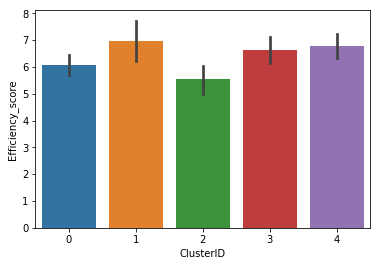

In [111]:
# plotting the data for mean values 
sns.barplot(x=df_km.ClusterID, y=df_km.Efficiency_score)

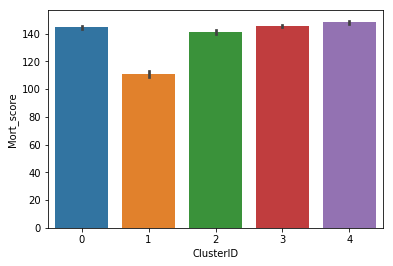

In [112]:
# plotting the data for mean values 
sns.barplot(x=df_km.ClusterID, y=df_km.Mort_score)

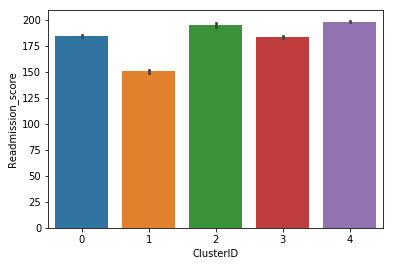

In [113]:
# plotting the data for mean values 
sns.barplot(x=df_km.ClusterID, y=df_km.Readmission_score)

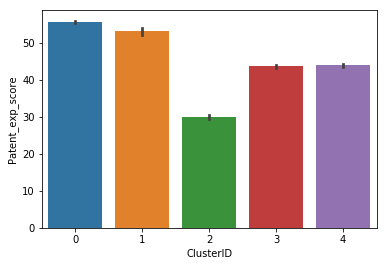

In [114]:
# plotting the data for mean values 
sns.barplot(x=df_km.ClusterID, y=df_km.Patent_exp_score)